In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm, t, sem

## Simulating some population sample

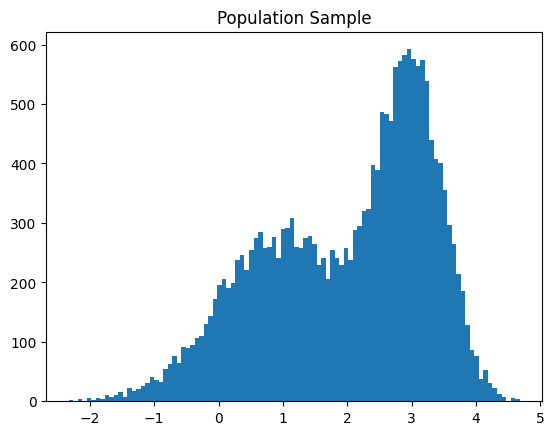

In [2]:
d1 = norm(loc=1, scale=1)
d2 = norm(loc=3, scale=.5)

sample = np.concatenate([d1.rvs(10000), d2.rvs(10000)])
sample_size = len(sample)

plt.hist(sample, bins=100)
plt.title("Population Sample")
plt.show()

In [3]:
print(f"Sample mean: {sample.mean()}")

Sample mean: 1.998856944244149


## Get confidence interval for mean estimate from ttest

In [4]:
# .95 confidence interval for the mean based on ttest
interval_t = t.interval(0.95, sample_size-1, loc=sample.mean(), scale=sem(sample))
interval_t

(1.981221560892953, 2.016492327595345)

## Get a confidence interval from bootstrapping

Bootstrapping basic idea is to sample with replacement from the population sample many times. If the population sample is representative this simulates the process of taking many samples from the population, so the distribution of the statistic of interest, e.g. the mean, can be simulated.Based on this simulation a confidence interval can be constructed based on percentiles. 

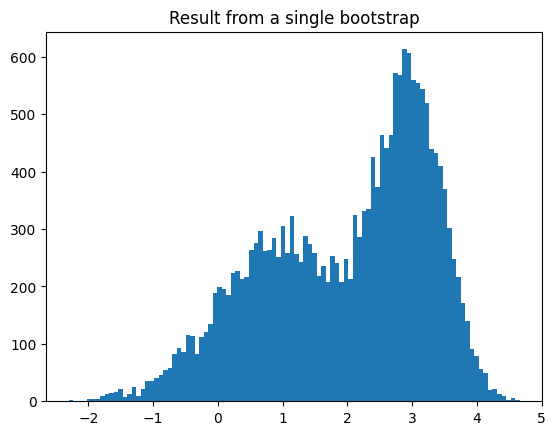

In [5]:
# Doing a single bootstrap

plt.hist(np.random.choice(sample, size=sample_size, replace=True), bins=100)
plt.title("Result from a single bootstrap")
plt.show()

In [6]:
# function for getting means of n bootstraps

def bootstrap_sample_means(n=1):
    """
    Takes n bootstrapping samples and returns an array of the means of the samples.
    """
    means = [np.random.choice(sample, size=sample_size, replace=True).mean() for i in range(n)]
    return means

# small test
bootstrap_sample_means(5)

[2.0058467664308552,
 1.989921794254955,
 1.9839129100810915,
 2.0074621684140688,
 2.009798528814873]

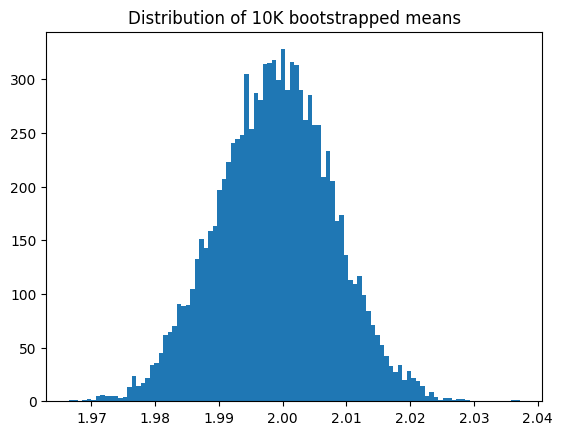

In [7]:
plt.hist(bootstrap_sample_means(10000), bins=100)
plt.title("Distribution of 10K bootstrapped means")
plt.show()

In [8]:
# calculate confidence interval from bootstrap
def get_interval(n):#
    """
    Based on n bootstrapped sample means calculates the confidence interval via percentiles of the sample means distribution.
    """
    means = bootstrap_sample_means(n)
    interval_bootstrap = [np.percentile(means, 2.5), np.percentile(means, 97.5)]
    return interval_bootstrap

get_interval(10000)

[1.981572763557304, 2.016332797042976]

In [9]:
# t interval for comparison
interval_t

(1.981221560892953, 2.016492327595345)

In [11]:
"""
Appears to be rather quite, nice
"""

'\nAppears to be rather quite, nice\n'